# Compute Pi Using a Monte Carlo Simulation

This notebook shows how to calculate the mathematical constant pi using a monte carlo simulation.  As defined on wikipedia a [monte carlo simulation](https://en.wikipedia.org/wiki/Monte_Carlo_method) is a computational algorithm that uses random sampling to obtain numeric results.

The constant pi is equal to the circumference of any circle divided by the circle's diameter.  

\begin{align}
\pi=\frac{Circumference}{Diameter}
\end{align}

Since we are working with a circle who's diameter is 1 and a square where each side is 1, we can define the ratio p as follows.  The goal of the equation for p is to define pi in terms of things that we can compute in a monte carlo simulation.

\begin{align}
p=\frac{CircleArea}{SquareArea}=\frac{\pi r^2}{s^2}=\frac{\pi 0.5^2}{1^2}=\frac{\pi 0.25}{1}=\frac{\pi}{4}=\frac{3.141593}{4}\approx0.7854
\end{align}

In the above equation, s is the length of the side of the square, r is the circle radius, and p is a constant which is defined in terms of pi.

Now rearranging the result from the above equation for p, we can define pi in terms of things which we can simulate in a monte carlo simulation:

\begin{align}
\pi\approx p*4
\end{align}

In the cell below, a 1x1 square, and a circle with diameter = 1 is plotted.  The square is centered at 0,0.  Uniform points are generated between -.5,-.5 and .5,.5.  Points that lie inside the circle are plotted in green, points that lie outside the circle are plotted in red.  

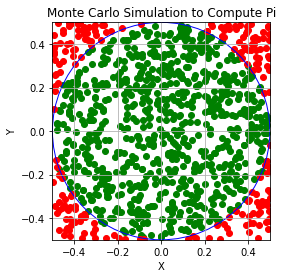

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

min_val = -.5
max_val = .5

plt.figure()
plt.grid()
circle = plt.Circle((0,0),.5,color='blue', fill=None)
plt.gcf().gca().add_artist(circle)
plt.gcf().gca().set_aspect('equal','box')
plt.title("Monte Carlo Simulation to Compute Pi")
plt.xlabel("X")
plt.ylabel("Y")

plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

# generate some random points inside a square who's side length is 1 with the center of the square at 0,0
points = np.array(np.random.uniform(low=min_val, high=max_val, size=(1000,2)))

# find points inside the circle
radius_squared = np.square((max_val-min_val)/2)

# use the circle equation to determine what points are inside and outside the circle
inside = points[np.square(points[:,0]) + np.square(points[:,1]) < radius_squared]
outside = points[np.square(points[:,0]) + np.square(points[:,1]) >= radius_squared]

# plot the inside points
plt.scatter(inside[:,0], inside[:,1],color='green')

# plot the outside points
plt.scatter(outside[:,0], outside[:,1],color='red')

It turns out that we can estimate the ratio p defined above by randomly generating points and placing them in the unit square above.  The points inside the circle are plotted in green, the points outside the circle are plotted in red.  The ratio of the number of points inside the circle (green points) to the number of points inside the square (the total number of points) is a good approximation of the ratio of the area of the circle to the area of the square.

\begin{align}
p \approx \frac{m}{N}
\end{align}

Where m is the number of points that fall inside the circle and N is the number of points that fall inside the square.  Note that the number of points that fall inside the square is also equal to the total number of points because all points that fall inside the circle also fall inside the square.

In the following code cell, we first generate a 2 dimensional numpy array containing 100,000 x, y point pairs.  Next, we check if each point is inside the circle using the general equation of a circle centered at the origin:

\begin{align}
r^2=x^2+y^2
\end{align}

Where r is the radius of the circle, and x, y are various points on the circle.

In the code cell below, we generate random points in the range 0 to 1 and check if the point is in the circle using the following equation:

\begin{align}
x^2+y^2<r^2
\end{align}

In [2]:
import numpy as np

# generate a uniform numpy array representing (x,y) on the grid
# the random function generates values between -.5 and .5
N = 100000
points = np.array(np.random.uniform(low=min_val, high=max_val, size=(N,2)))
print("points shape:", points.shape)

radius_squared = np.square((max_val-min_val)/2)

# calculate the radius vals using the equation of a circle
radius_vals = np.square(points[:,0]) + np.square(points[:,1])

# find the number of points that fall inside the circle
m = sum(radius_vals < radius_squared)

# find the ratio p
p = m/N

# find pi
pi = p*4

print("The approximation of pi =", pi)

points shape: (100000, 2)
The approximation of pi = 3.13524


What happens to the geometry of the simulation if we generate random points in the range from zero to one and change the comparison to see if the radius is inside the circle to the following:

\begin{align}
x^2+y^2<1
\end{align}

This is actually the most common way I see the pi monte carlo simulation described on the internet.  There is a clue when we plot the data in the next cell.

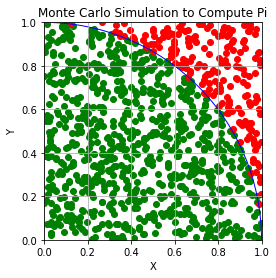

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Changed from -0.5 to .5 in the above simulation to 0 to 1
# This cuts the size from full circle to 1/4 circle 
min_val = 0
max_val = 1

plt.figure()
plt.grid()
circle = plt.Circle((0,0),1,color='blue', fill=None)
plt.gcf().gca().add_artist(circle)
plt.gcf().gca().set_aspect('equal','box')
plt.title("Monte Carlo Simulation to Compute Pi")
plt.xlabel("X")
plt.ylabel("Y")

plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

# set the number of points in the sim
N = 1000

# generate some random points inside a square who's side length is 1 with the center of the square at 0,0
points = np.array(np.random.uniform(low=min_val, high=max_val, size=(N,2)))

# find points inside the circle, note that the squared radius is set to 1
radius_squared = 1
inside = points[np.square(points[:,0]) + np.square(points[:,1]) < radius_squared]
outside = points[np.square(points[:,0]) + np.square(points[:,1]) >= radius_squared]

# plot the inside points
plt.scatter(inside[:,0], inside[:,1],color='green')

# plot the outside points
plt.scatter(outside[:,0], outside[:,1],color='red')

The following cell calculates pi using radius squared = 1 and only positive points.

In [5]:
# generate a random uniform numpy array representing (x,y) on the grid
# the random function generates values between 0 and 1
N = 100000
min_val = 0
max_val = 1

# generate the points
points = np.array(np.random.uniform(low=min_val, high=max_val, size=(N,2)))
print("points shape:", points.shape)

radius_squared = 1

# calculate the radius vals using the equation of a circle
radius_vals = np.square(points[:,0]) + np.square(points[:,1])

# find the number of points that fall inside the circle
m = sum(radius_vals < radius_squared)

# find the ratio p
p = m/N

# find pi
pi = p*4

print("The approximation of pi =", pi)

points shape: (100000, 2)
The approximation of pi = 3.12808
